<a href="https://colab.research.google.com/github/noahbereketab/Examining-Fairness-and-Impact-of-Black-Box-Machine-Learning-Algorithms-Senior-Thesis-/blob/main/COMPAS_Judge_Level_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup + Printing out Common Judges + Number of cases for each judge before and after COMPAS

In [1]:
import pandas as pd
!pip install causalml

df = pd.read_csv('browardcourts.csv')
judges_with_none = df[df['compas'] == 'none']['judge'].unique()

judges_with_non_none = df[df['compas'] != 'none']['judge'].unique()

common_judges = set(judges_with_none) & set(judges_with_non_none)

print(list(common_judges))
print(len(common_judges))

case_counts = {}
for judge in common_judges:
    before_count = df[(df['judge'] == judge) & (df['compas'] == 'none')].shape[0]
    after_count = df[(df['judge'] == judge) & (df['compas'] != 'none')].shape[0]
    case_counts[judge] = {'Before': before_count, 'After': after_count}

for judge, counts in case_counts.items():
    print(f"Judge: {judge}, Cases Before: {counts['Before']}, Cases After: {counts['After']}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.1 MB/s eta 0:00:00
  Using cached Cython-0.29.34-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.2/745.2 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Usin

## How influenced is each judge by the introduction of COMPAS scores when sentencing a defendant? (Confinement rate before COMPAS and for each COMPAS category)



In [2]:
df_common = df[df['judge'].isin(common_judges)]

def calculate_confinement_rate(group):
    return group['confinement'].mean()

confinement_rates = df_common.groupby(['judge', 'compas']).apply(calculate_confinement_rate).unstack()

print(confinement_rates)


average_confinement_rates = confinement_rates.mean(axis=0)

print("\nAverage confinement rates for each COMPAS score category across all judges:")
print(average_confinement_rates)




compas                       none  vhighrhigh  vhighrlow  vhighrmedium  \
judge                                                                    
Alspector, Susan L       0.044776    0.500000        NaN      0.500000   
Avalos, Catalina         0.695238    0.833333        1.0      0.833333   
Bailey, Tim              0.699088    0.900000        NaN      0.833333   
Berman, Fred J           0.412698    0.666667        NaN           NaN   
Bober, Bernard I         0.952381    0.888889        NaN      1.000000   
Brown, Melinda           0.464286    0.714286        1.0      0.000000   
Carpenter-Toye, Deborah  0.428571    1.000000        NaN      0.000000   
Coleman, Thomas J        0.697605    0.913043        NaN      0.750000   
Davis, N Hunter          0.706070    0.884615        NaN      0.750000   
Diaz, Robert F           0.376812         NaN        NaN           NaN   
Duffy, Barbara R         0.758523    0.750000        NaN      0.600000   
Fein, Martin S           0.961538    0

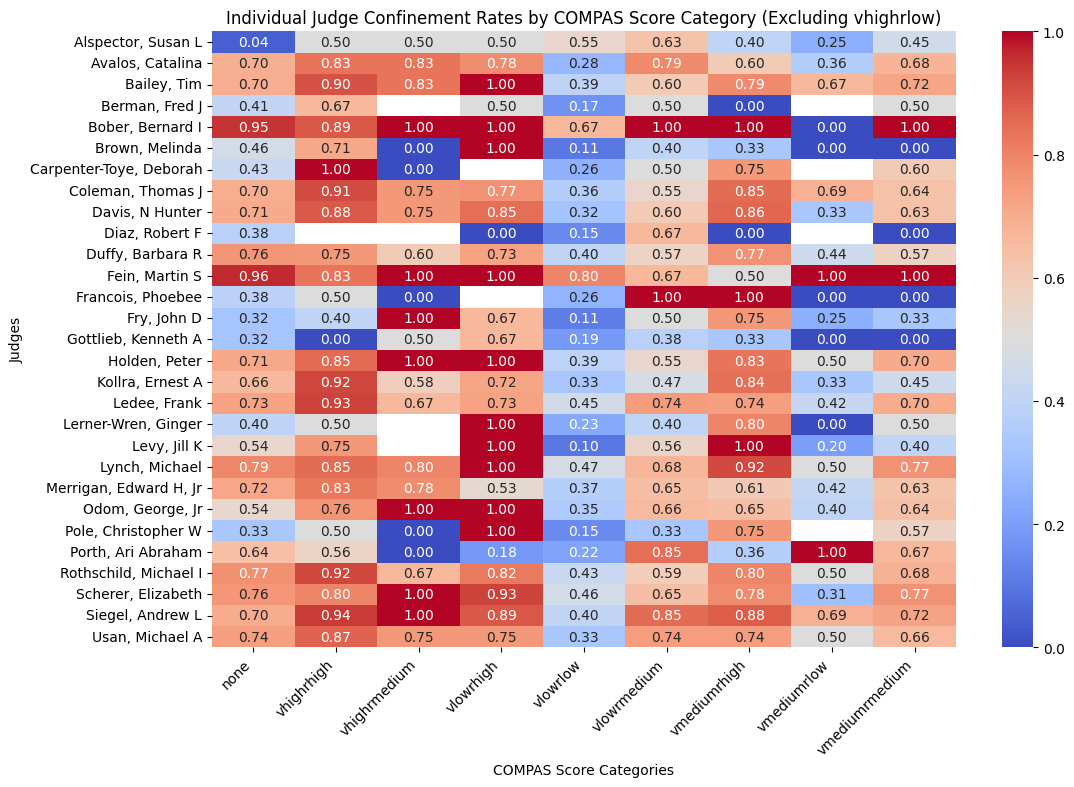

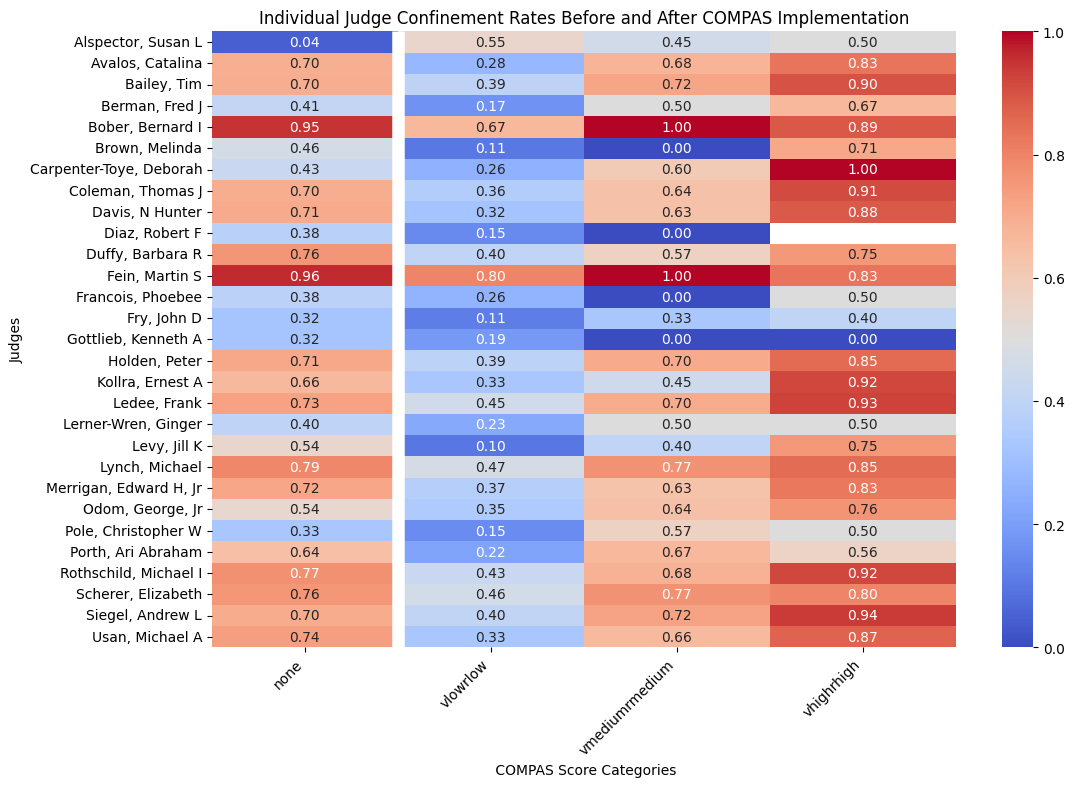

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

confinement_rates_filtered = confinement_rates.drop('vhighrlow', axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(confinement_rates_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Individual Judge Confinement Rates by COMPAS Score Category (Excluding vhighrlow)')
plt.xlabel('COMPAS Score Categories')
plt.ylabel('Judges')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

confinement_rates_filtered_more = confinement_rates.drop(['vhighrlow', 'vhighrmedium', 'vlowrhigh', 'vlowrmedium', 'vmediumrhigh', 'vmediumrlow'], axis=1)


new_order = ['none', 'vlowrlow', 'vmediumrmedium', 'vhighrhigh']

confinement_rates_ordererd = confinement_rates_filtered_more[new_order]

plt.figure(figsize=(12, 8))
ax = sns.heatmap(confinement_rates_ordererd, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Individual Judge Confinement Rates Before and After COMPAS Implementation')
plt.xlabel(' COMPAS Score Categories')
plt.ylabel('Judges')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

ax.vlines(x=1, ymin=0, ymax=len(confinement_rates_filtered.index), color='white', lw=9)

plt.show()


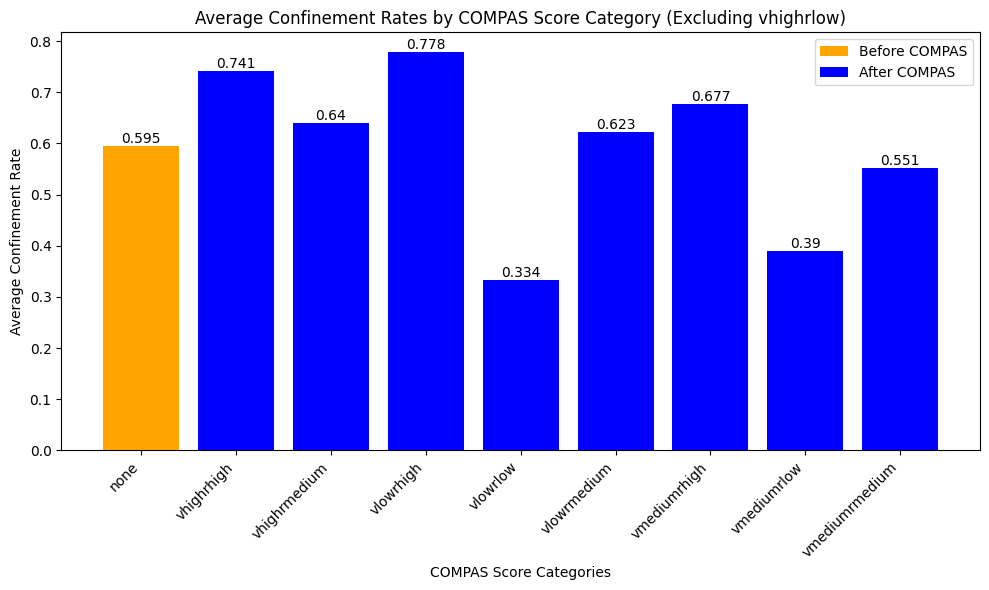

In [4]:
import matplotlib.pyplot as plt

# Assuming `average_confinement_rates` is your Series with the data provided
# Exclude 'vhighrlow' category
filtered_rates = average_confinement_rates.drop('vhighrlow')

categories = filtered_rates.index.tolist()
rates = filtered_rates.values

plt.figure(figsize=(10, 6))

label_before_compas = 'Before COMPAS'
label_after_compas = 'After COMPAS'
added_legend_for_before = False
added_legend_for_after = False

for i, (category, rate) in enumerate(zip(categories, rates)):
    if category == 'none':
        # Make the 'none' bar orange, with a label
        plt.bar(category, rate, color='orange',
                label=label_before_compas if not added_legend_for_before else "")
        added_legend_for_before = True
    else:
        plt.bar(category, rate, color='blue',
                label=label_after_compas if not added_legend_for_after else "")
        added_legend_for_after = True

bars = plt.bar(categories, rates, color='none', edgecolor='none')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3),
             ha='center', va='bottom')

plt.xlabel('COMPAS Score Categories')
plt.ylabel('Average Confinement Rate')
plt.title('Average Confinement Rates by COMPAS Score Category (Excluding vhighrlow)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the legend
plt.legend()

plt.show()


In [5]:
import scipy.stats

# Function to map COMPAS categories to binary outcomes
def compas_binary_mapping(compas_category, target_categories):
    return 1 if compas_category in target_categories else 0

# Target categories for confinement and non-confinement

confinement_categories = ['vhighrhigh', 'vlowrhigh', 'vmediumrhigh', 'vhighrmedium', 'vmediumrmedium', 'vlowrmedium']
non_confinement_categories = ['vhighrlow', 'vlowrlow', 'vmediumrlow']


# Calculate correlation for confinement categories
confinement_correlations = df_common.groupby('judge').apply(lambda x: scipy.stats.pearsonr(x['compas'].apply(compas_binary_mapping, args=(confinement_categories,)), x['confinement'])[0])

# Calculate correlation for non-confinement categories
non_confinement_correlations = df_common.groupby('judge').apply(lambda x: scipy.stats.pearsonr(x['compas'].apply(compas_binary_mapping, args=(non_confinement_categories,)), 1 - x['confinement'])[0])


print("Correlation coefficients for confinement categories:", confinement_correlations)
print("Correlation coefficients for non-confinement categories:", non_confinement_correlations)


Correlation coefficients for confinement categories: judge
Alspector, Susan L         0.327451
Avalos, Catalina           0.285097
Bailey, Tim                0.127743
Berman, Fred J             0.055777
Bober, Bernard I           0.058526
Brown, Melinda             0.142140
Carpenter-Toye, Deborah    0.260129
Coleman, Thomas J          0.059364
Davis, N Hunter            0.112671
Diaz, Robert F             0.108676
Duffy, Barbara R          -0.012899
Fein, Martin S            -0.225374
Francois, Phoebee          0.169560
Fry, John D                0.183815
Gottlieb, Kenneth A        0.070264
Holden, Peter              0.115102
Kollra, Ernest A           0.038623
Ledee, Frank               0.081648
Lerner-Wren, Ginger        0.158151
Levy, Jill K               0.182824
Lynch, Michael             0.088457
Merrigan, Edward H, Jr     0.041254
Odom, George, Jr           0.239374
Pole, Christopher W        0.210932
Porth, Ari Abraham        -0.053213
Rothschild, Michael I      0.064980
Scher

In [6]:
import scipy.stats

# Adjusted function to calculate correlations for a specified race and category
def calculate_correlation_by_race(df, race, target_categories, is_non_confinement=False):
    # Filter the DataFrame for the specified race
    df_race = df[df['race'] == race]

    # Group by judge, then calculate Pearson's correlation for each judge
    correlations = df_race.groupby('judge').apply(
        lambda group: scipy.stats.pearsonr(
            group['compas'].apply(compas_binary_mapping, args=(target_categories,)),
            1 - group['confinement'] if is_non_confinement else group['confinement']
        )[0]
    )

    return correlations

# Define your categories
confinement_categories = ['vhighrhigh', 'vlowrhigh', 'vmediumrhigh', 'vhighrmedium', 'vmediumrmedium', 'vlowrmedium']
non_confinement_categories = ['vhighrlow', 'vlowrlow', 'vmediumrlow']

# Calculate correlations for 'Black' individuals
black_confinement_correlations = calculate_correlation_by_race(df_common, 'Black', confinement_categories)
black_non_confinement_correlations = calculate_correlation_by_race(df_common, 'Black', non_confinement_categories, is_non_confinement=True)

# Calculate correlations for 'White' individuals
white_confinement_correlations = calculate_correlation_by_race(df_common, 'white', confinement_categories)
white_non_confinement_correlations = calculate_correlation_by_race(df_common, 'white', non_confinement_categories, is_non_confinement=True)

print("Correlation coefficients for 'Black' individuals in confinement categories:", black_confinement_correlations)
print("Correlation coefficients for 'Black' individuals in non-confinement categories:", black_non_confinement_correlations)
print("Correlation coefficients for 'White' individuals in confinement categories:", white_confinement_correlations)
print("Correlation coefficients for 'White' individuals in non-confinement categories:", white_non_confinement_correlations)


Correlation coefficients for 'Black' individuals in confinement categories: judge
Alspector, Susan L         0.149160
Avalos, Catalina           0.353247
Bailey, Tim                0.091796
Berman, Fred J             0.129099
Bober, Bernard I           0.005358
Brown, Melinda            -0.044662
Carpenter-Toye, Deborah    0.386050
Coleman, Thomas J          0.064761
Davis, N Hunter            0.140942
Diaz, Robert F            -0.009126
Duffy, Barbara R           0.004073
Fein, Martin S            -0.265064
Francois, Phoebee          0.190693
Fry, John D                0.131590
Gottlieb, Kenneth A       -0.016301
Holden, Peter              0.088128
Kollra, Ernest A           0.002343
Ledee, Frank               0.100757
Lerner-Wren, Ginger        0.193122
Levy, Jill K               0.264443
Lynch, Michael             0.090291
Merrigan, Edward H, Jr     0.029637
Odom, George, Jr           0.215827
Pole, Christopher W        0.210259
Porth, Ari Abraham         0.012058
Rothschild, Michae

In [7]:
from sklearn.metrics import cohen_kappa_score

# Function to map COMPAS categories to binary outcomes
def compas_binary_mapping_for_kappa(compas_category, target_categories):
    return compas_category in target_categories

# Calculate Cohen's Kappa for confinement categories
confinement_kappas = df_common.groupby('judge').apply(lambda x: cohen_kappa_score(x['compas'].apply(compas_binary_mapping_for_kappa, args=(confinement_categories,)), x['confinement']))

# Calculate Cohen's Kappa for non-confinement categories
non_confinement_kappas = df_common.groupby('judge').apply(lambda x: cohen_kappa_score(x['compas'].apply(compas_binary_mapping_for_kappa, args=(non_confinement_categories,)), 1 - x['confinement']))

print("Cohen's Kappa scores for confinement categories:", confinement_kappas)
print("Cohen's Kappa scores for non-confinement categories:", non_confinement_kappas)


Cohen's Kappa scores for confinement categories: judge
Alspector, Susan L         0.327451
Avalos, Catalina           0.251031
Bailey, Tim                0.091691
Berman, Fred J             0.043819
Bober, Bernard I           0.018154
Brown, Melinda             0.124579
Carpenter-Toye, Deborah    0.208389
Coleman, Thomas J          0.043094
Davis, N Hunter            0.084640
Diaz, Robert F             0.088880
Duffy, Barbara R          -0.008256
Fein, Martin S            -0.062257
Francois, Phoebee          0.129837
Fry, John D                0.162119
Gottlieb, Kenneth A        0.059735
Holden, Peter              0.077941
Kollra, Ernest A           0.029345
Ledee, Frank               0.051600
Lerner-Wren, Ginger        0.123934
Levy, Jill K               0.149896
Lynch, Michael             0.052598
Merrigan, Edward H, Jr     0.031385
Odom, George, Jr           0.216129
Pole, Christopher W        0.198560
Porth, Ari Abraham        -0.040885
Rothschild, Michael I      0.041411
Scherer, 

In [8]:
from sklearn.metrics import cohen_kappa_score

# Function to map COMPAS categories to binary outcomes
def compas_binary_mapping_for_kappa(compas_category, target_categories):
    return compas_category in target_categories

# Function to calculate Cohen's Kappa scores by race
def calculate_kappa_by_race(df, race, target_categories, is_non_confinement=False):
    # Filter the DataFrame for the specified race
    df_race = df[df['race'] == race]

    # Group by judge, then calculate Cohen's Kappa for each judge
    kappas = df_race.groupby('judge').apply(
        lambda group: cohen_kappa_score(
            group['compas'].apply(compas_binary_mapping_for_kappa, args=(target_categories,)),
            1 - group['confinement'] if is_non_confinement else group['confinement']
        )
    )

    return kappas

# Target categories for confinement and non-confinement
confinement_categories = ['vhighrhigh', 'vlowrhigh', 'vmediumrhigh', 'vhighrmedium', 'vmediumrmedium', 'vlowrmedium']
non_confinement_categories = ['vhighrlow', 'vlowrlow', 'vmediumrlow']

# Assuming 'df_common' is your DataFrame containing the necessary data including a 'race' column
# Calculate Cohen's Kappa for 'Black' individuals
black_confinement_kappas = calculate_kappa_by_race(df_common, 'Black', confinement_categories)
black_non_confinement_kappas = calculate_kappa_by_race(df_common, 'Black', non_confinement_categories, is_non_confinement=True)

# Calculate Cohen's Kappa for 'White' individuals
white_confinement_kappas = calculate_kappa_by_race(df_common, 'White', confinement_categories)
white_non_confinement_kappas = calculate_kappa_by_race(df_common, 'White', non_confinement_categories, is_non_confinement=True)

print("Cohen's Kappa scores for 'Black' individuals in confinement categories:", black_confinement_kappas)
print("Cohen's Kappa scores for 'Black' individuals in non-confinement categories:", black_non_confinement_kappas)
print("Cohen's Kappa scores for 'White' individuals in confinement categories:", white_confinement_kappas)
print("Cohen's Kappa scores for 'White' individuals in non-confinement categories:", white_non_confinement_kappas)


Cohen's Kappa scores for 'Black' individuals in confinement categories: judge
Alspector, Susan L         0.149160
Avalos, Catalina           0.328325
Bailey, Tim                0.071356
Berman, Fred J             0.117647
Bober, Bernard I           0.001679
Brown, Melinda            -0.040609
Carpenter-Toye, Deborah    0.362600
Coleman, Thomas J          0.049058
Davis, N Hunter            0.105329
Diaz, Robert F            -0.008230
Duffy, Barbara R           0.002709
Fein, Martin S            -0.082680
Francois, Phoebee          0.148148
Fry, John D                0.125000
Gottlieb, Kenneth A       -0.014679
Holden, Peter              0.061828
Kollra, Ernest A           0.001869
Ledee, Frank               0.063825
Lerner-Wren, Ginger        0.160000
Levy, Jill K               0.215440
Lynch, Michael             0.050663
Merrigan, Edward H, Jr     0.023392
Odom, George, Jr           0.203977
Pole, Christopher W        0.194346
Porth, Ari Abraham         0.009901
Rothschild, Michael I 

## How influenced is each judge by the introduction of COMPAS scores when sentencing a defendant? (Propensity Score Matching)

In [9]:
!pip install pandas seaborn matplotlib

from causalml.match import NearestNeighborMatch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df[df['judge'].isin(common_judges)]

df['Race_Black'] = df['race'].apply(lambda x: 1 if str(x).lower() == 'black' else 0)

df['gender_male'] = df['gender'].apply(lambda x: 1 if str(x).lower() == 'male' else 0)

df['court_felony'] = df['courttype'].apply(lambda x: 1 if str(x).lower() == 'felony' else 0)

df['public_defender_yes'] = df['publicdefender'].apply(lambda x: 1 if str(x).lower() == 'true' else 0)

df['Age_Category'] = pd.cut(df['age'], bins=[0, 25, 45, float('inf')], labels=[0, 1, 2])

compas_categories = ['vlowrlow', 'vlowrmedium', 'vlowrhigh', 'vmediumrlow', 'vmediumrhigh', 'vhighrmedium', 'vhighrlow', 'vhighrhigh', 'vmediumrmedium']

psm = NearestNeighborMatch(replace=True, ratio=1, random_state=42)

results = []

for judge, group_data in df.groupby('judge'):
    judge_results = []

    for category in compas_categories:
        group_data[f'{category}_vs_none'] = group_data['compas'].apply(lambda x: 1 if x.lower() == category else (0 if x.lower() == 'none' else None))

        group_filtered = group_data.dropna(subset=[f'{category}_vs_none'])

        num_cases = group_filtered[f'{category}_vs_none'].nunique()
        if num_cases < 2:
            print(f"Not enough cases for COMPAS category '{category}' for judge '{judge}'. Skipping.")
            continue

        try:
            matched = psm.match_by_group(data=group_filtered, treatment_col=f'{category}_vs_none', score_cols=['Race_Black', 'Age_Category', 'gender_male', 'court_felony', 'public_defender_yes', 'crimhistepisodes', 'crimhistdays'], groupby_col='judge')

            confinement_rates = matched.groupby([f'{category}_vs_none'])['confinement'].mean().reset_index()

            total_cases = matched.groupby([f'{category}_vs_none'])['confinement'].count().reset_index(name='Total_Cases')

            merged_df = pd.merge(confinement_rates, total_cases, on=[f'{category}_vs_none'], how='left')

            judge_results.append({
                'Category': category,
                'Results': merged_df
            })
        except ValueError as e:
            print(f"Error matching for COMPAS category '{category}' for judge '{judge}': {e}")

    results.append({
        'Judge': judge,
        'Categories_Results': judge_results
    })

for result in results:
    print(f"Judge: {result['Judge']}")
    for judge_result in result['Categories_Results']:
        print(f"COMPAS Category: {judge_result['Category']}")
        print("Judge  {}_vs_none  Confinement  Total_Cases".format(judge_result['Category']))
        print(judge_result['Results'].to_string(index=False))
        print("\n")


<ipython-input-9-7bd1f7fcd541>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race_Black'] = df['race'].apply(lambda x: 1 if str(x).lower() == 'black' else 0)
<ipython-input-9-7bd1f7fcd541>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender_male'] = df['gender'].apply(lambda x: 1 if str(x).lower() == 'male' else 0)
<ipython-input-9-7bd1f7fcd541>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Not enough cases for COMPAS category 'vhighrlow' for judge 'Alspector, Susan L'. Skipping.
Not enough cases for COMPAS category 'vhighrlow' for judge 'Bailey, Tim'. Skipping.
Not enough cases for COMPAS category 'vmediumrlow' for judge 'Berman, Fred J'. Skipping.
Not enough cases for COMPAS category 'vhighrmedium' for judge 'Berman, Fred J'. Skipping.
Not enough cases for COMPAS category 'vhighrlow' for judge 'Berman, Fred J'. Skipping.
Not enough cases for COMPAS category 'vhighrlow' for judge 'Bober, Bernard I'. Skipping.
Not enough cases for COMPAS category 'vlowrhigh' for judge 'Carpenter-Toye, Deborah'. Skipping.
Not enough cases for COMPAS category 'vmediumrlow' for judge 'Carpenter-Toye, Deborah'. Skipping.
Not enough cases for COMPAS category 'vhighrlow' for judge 'Carpenter-Toye, Deborah'. Skipping.
Not enough cases for COMPAS category 'vhighrlow' for judge 'Coleman, Thomas J'. Skipping.
Not enough cases for COMPAS category 'vhighrlow' for judge 'Davis, N Hunter'. Skipping.
No

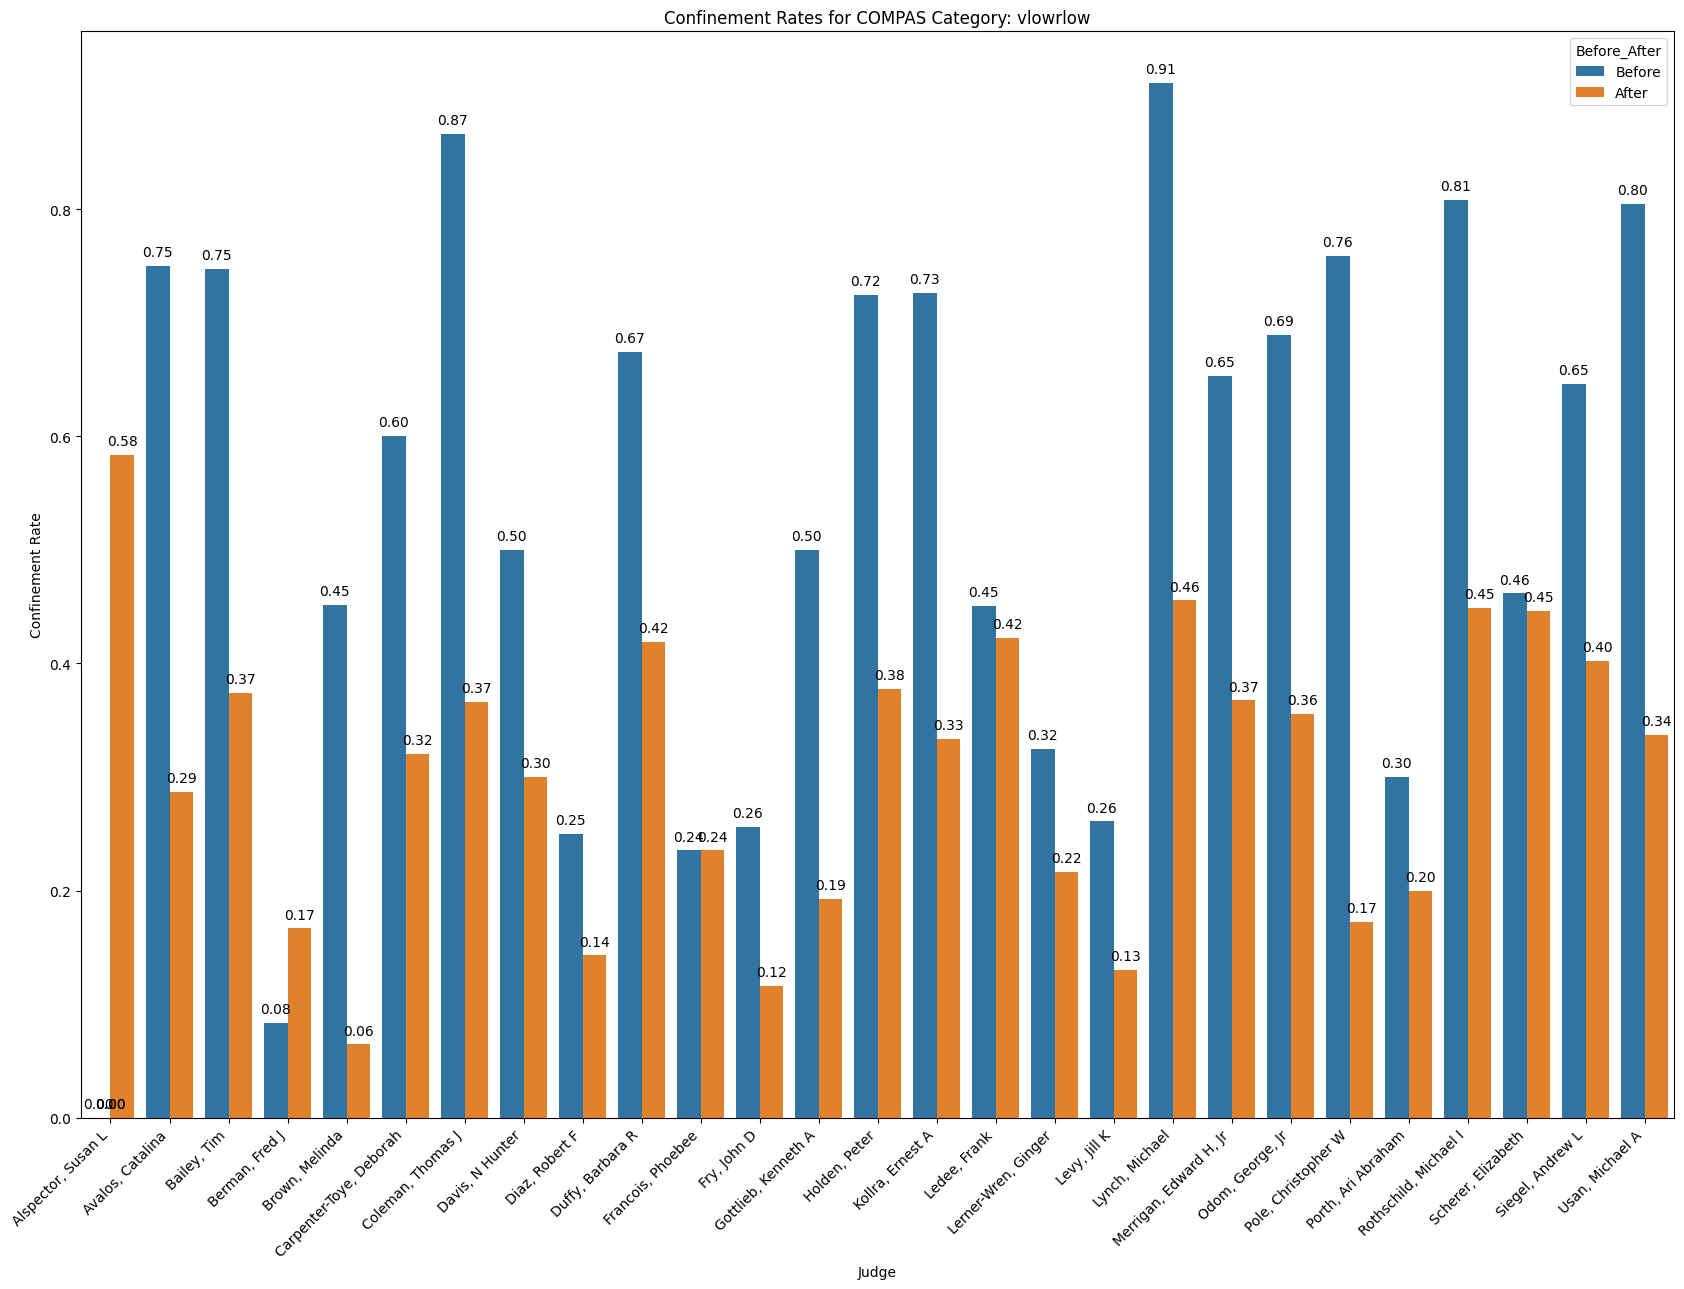

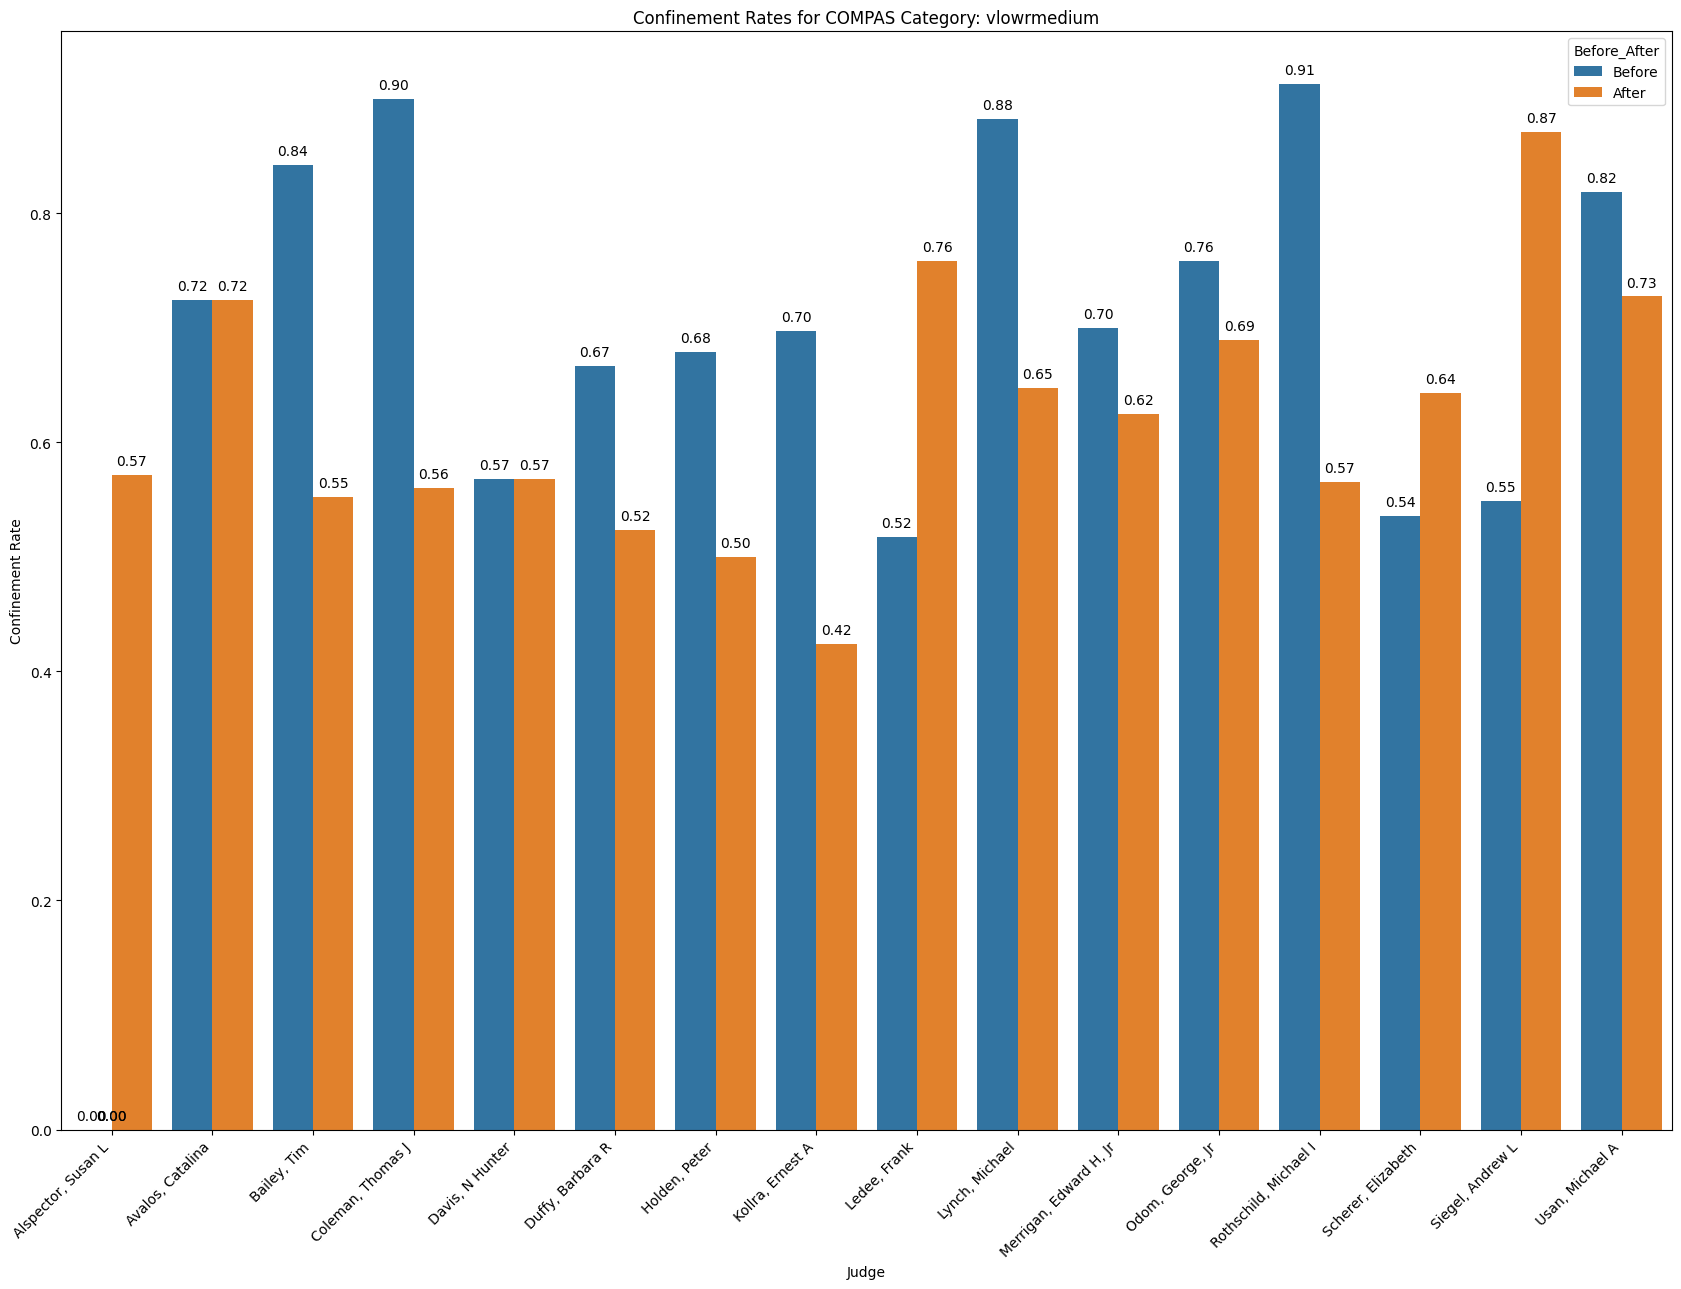

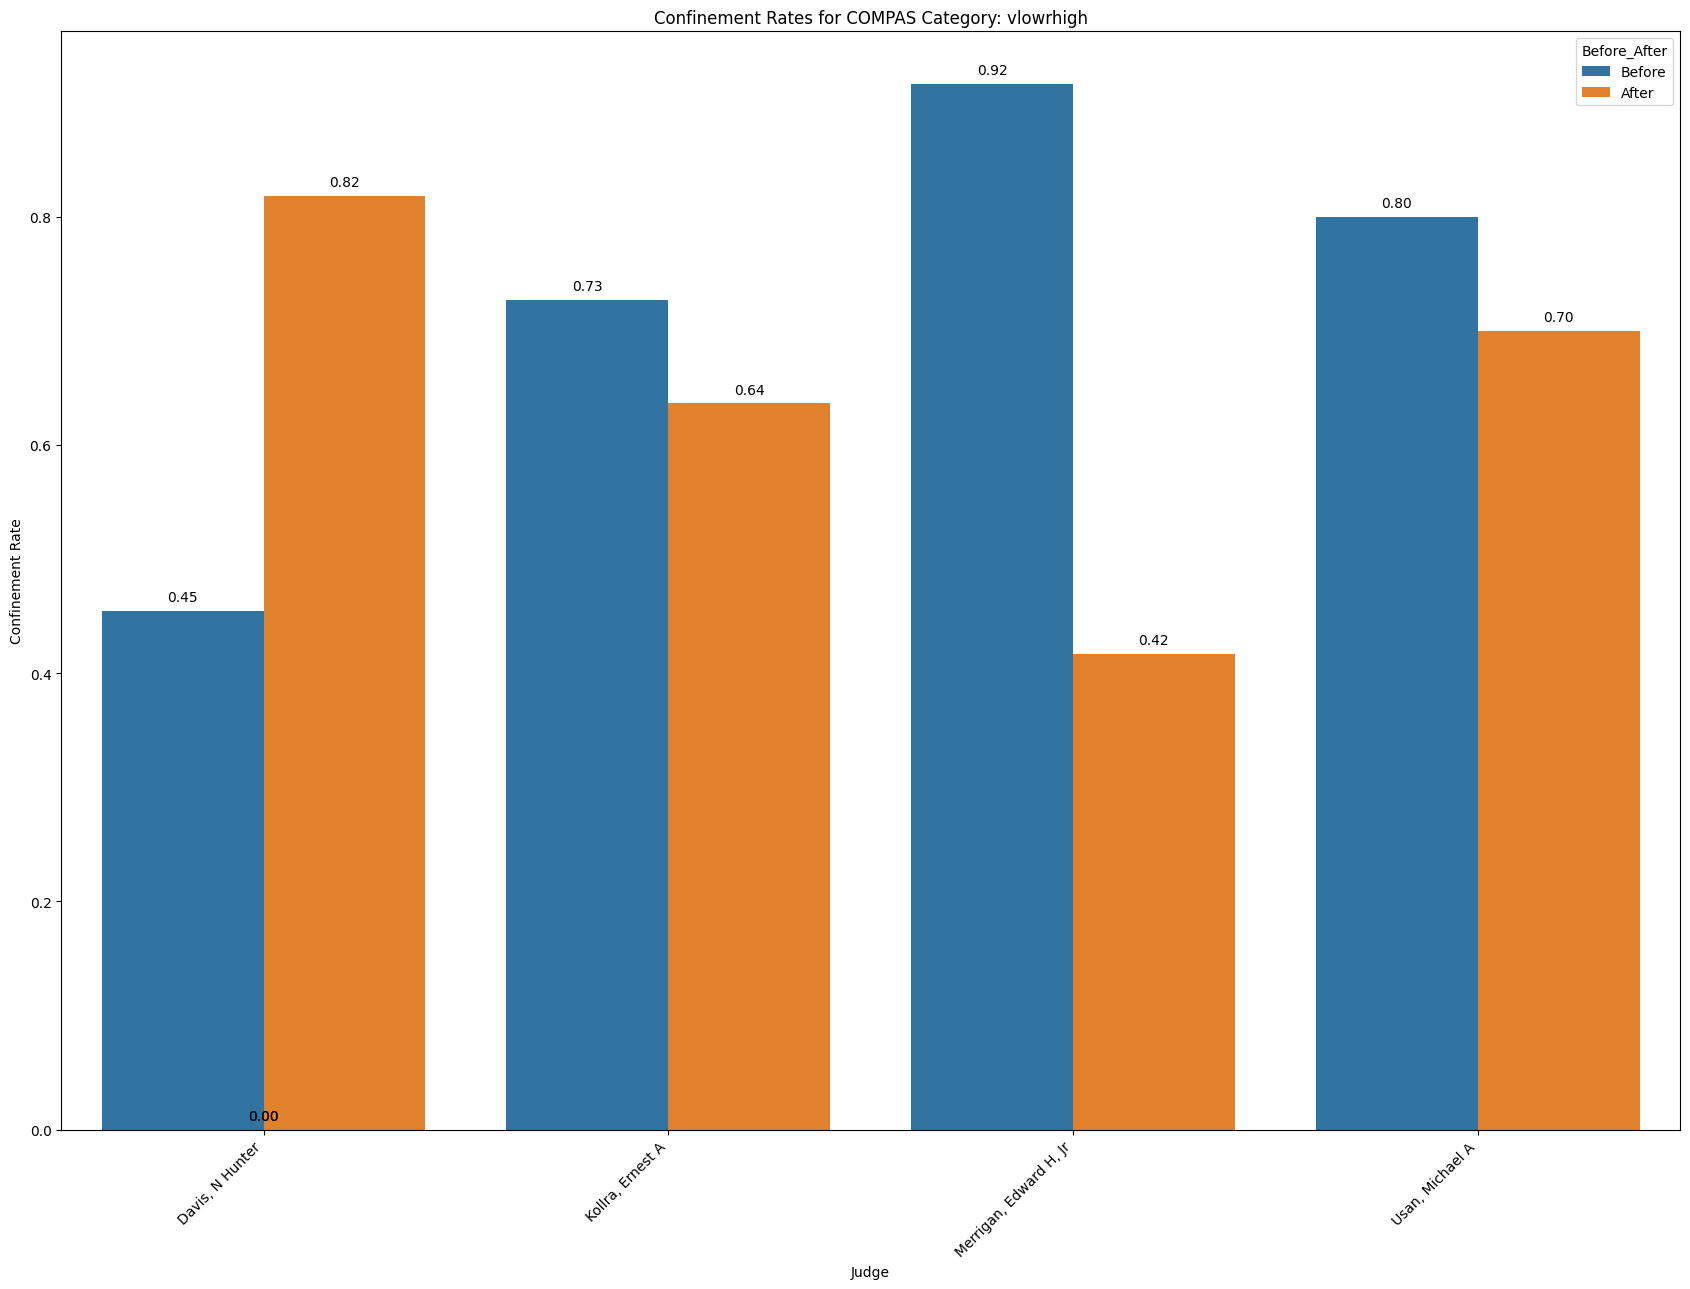

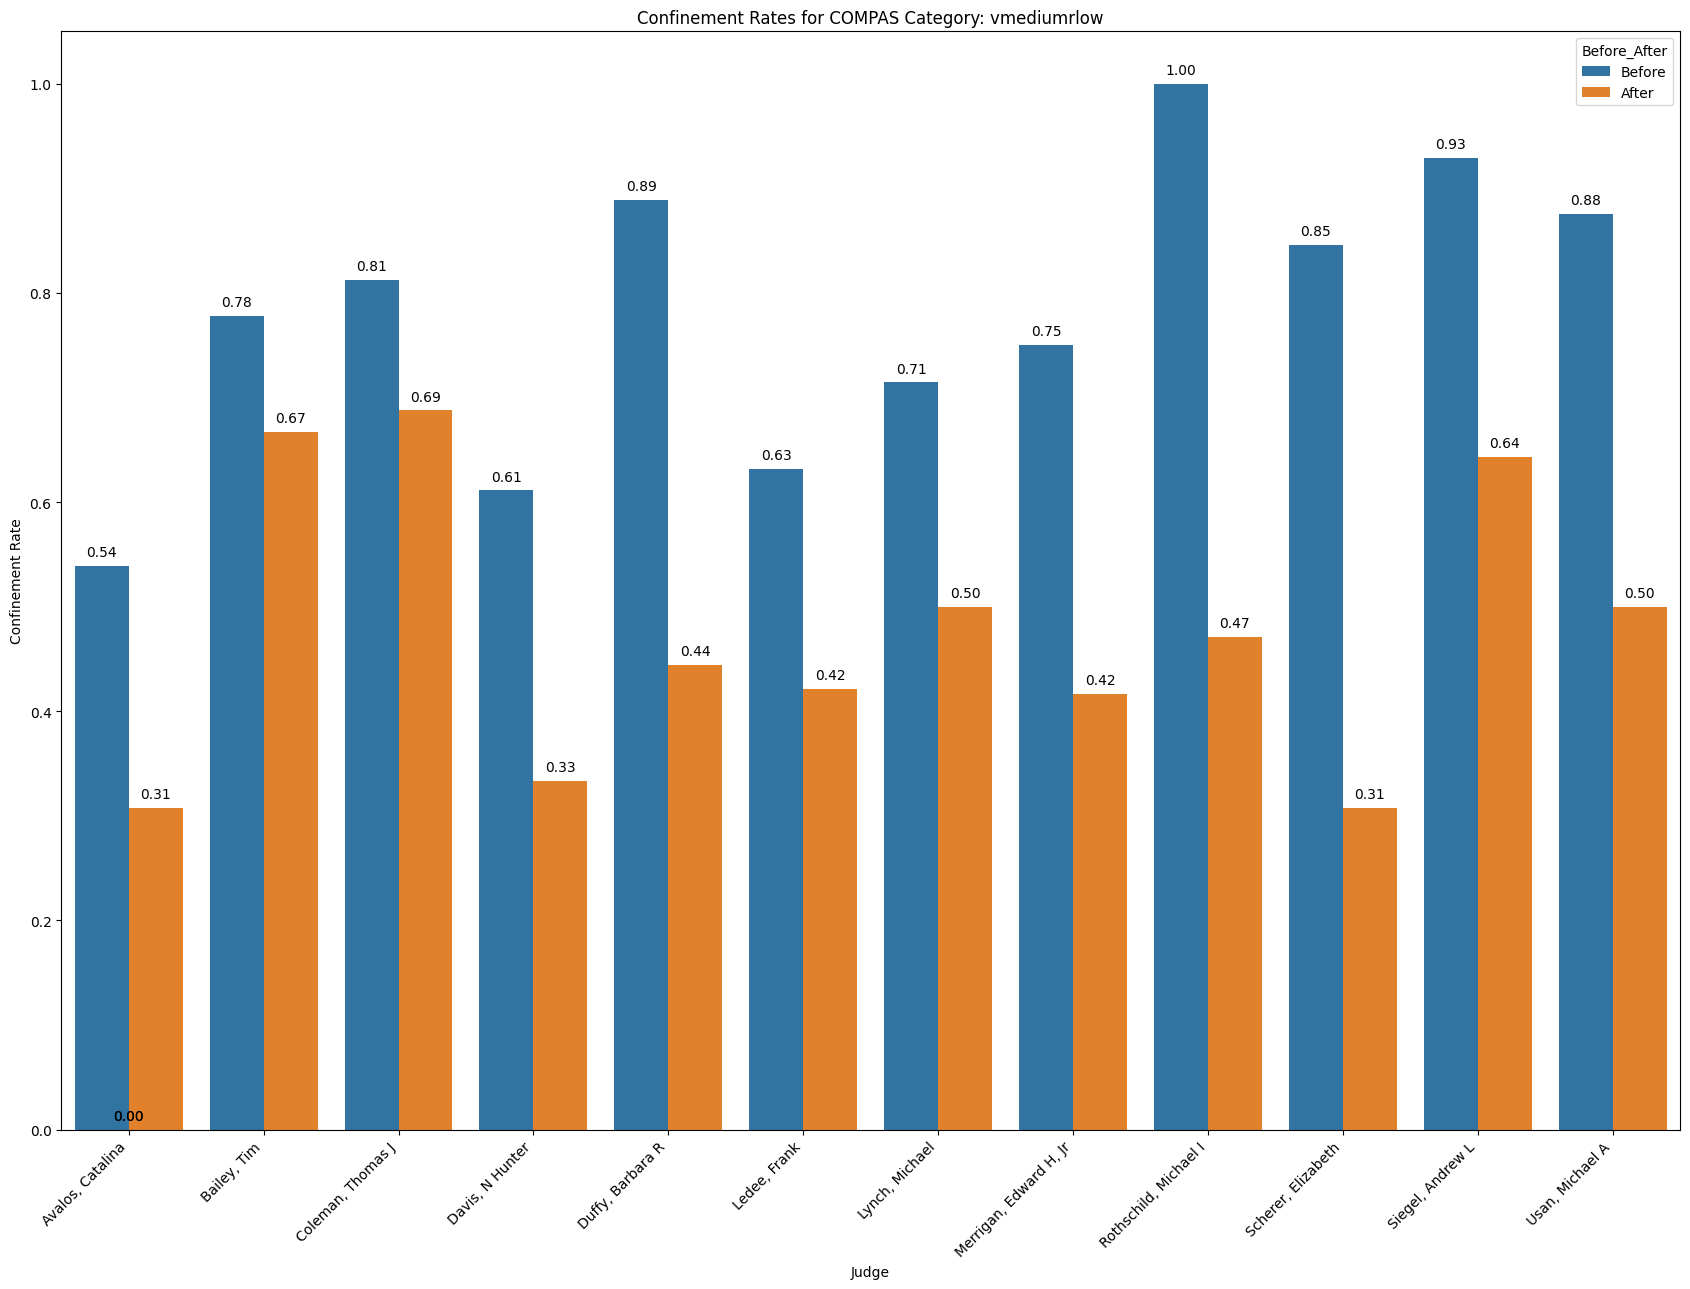

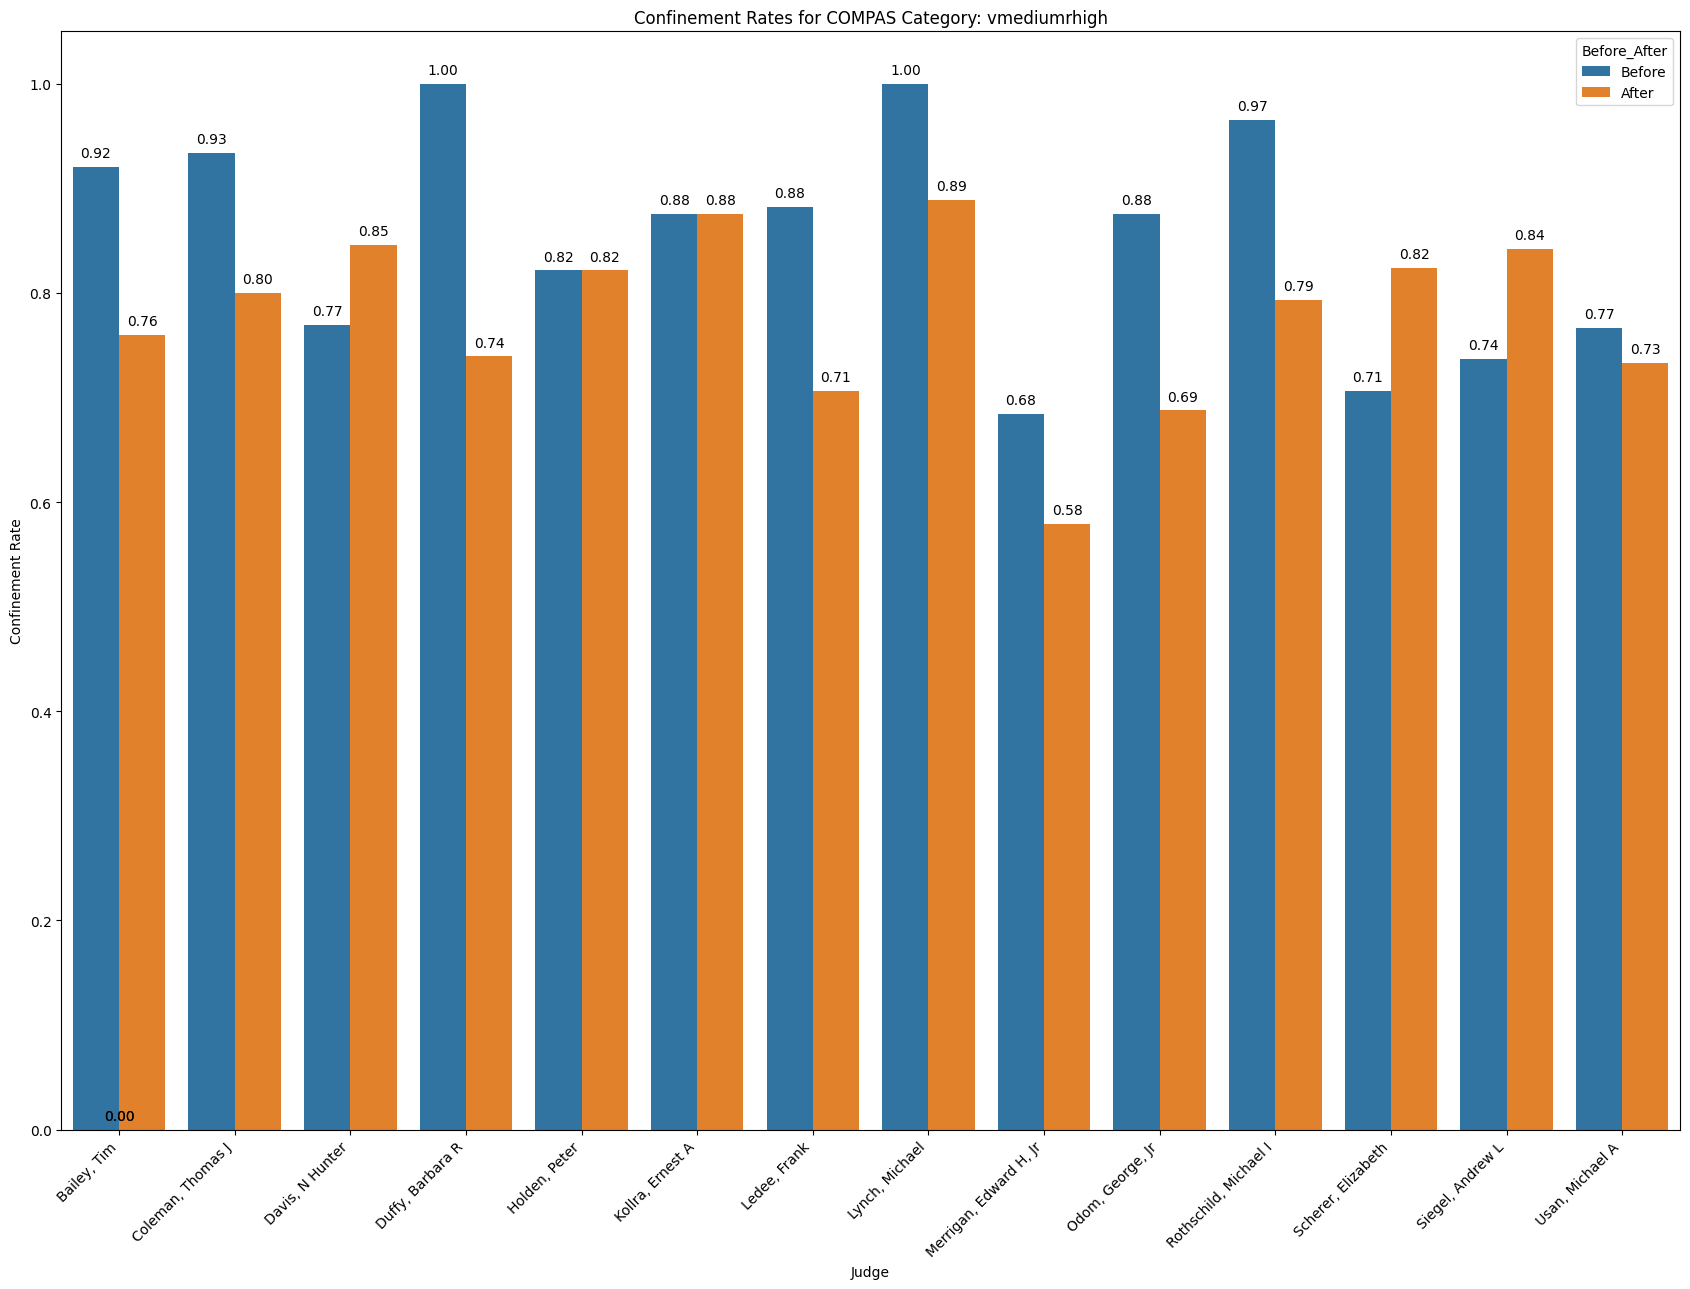

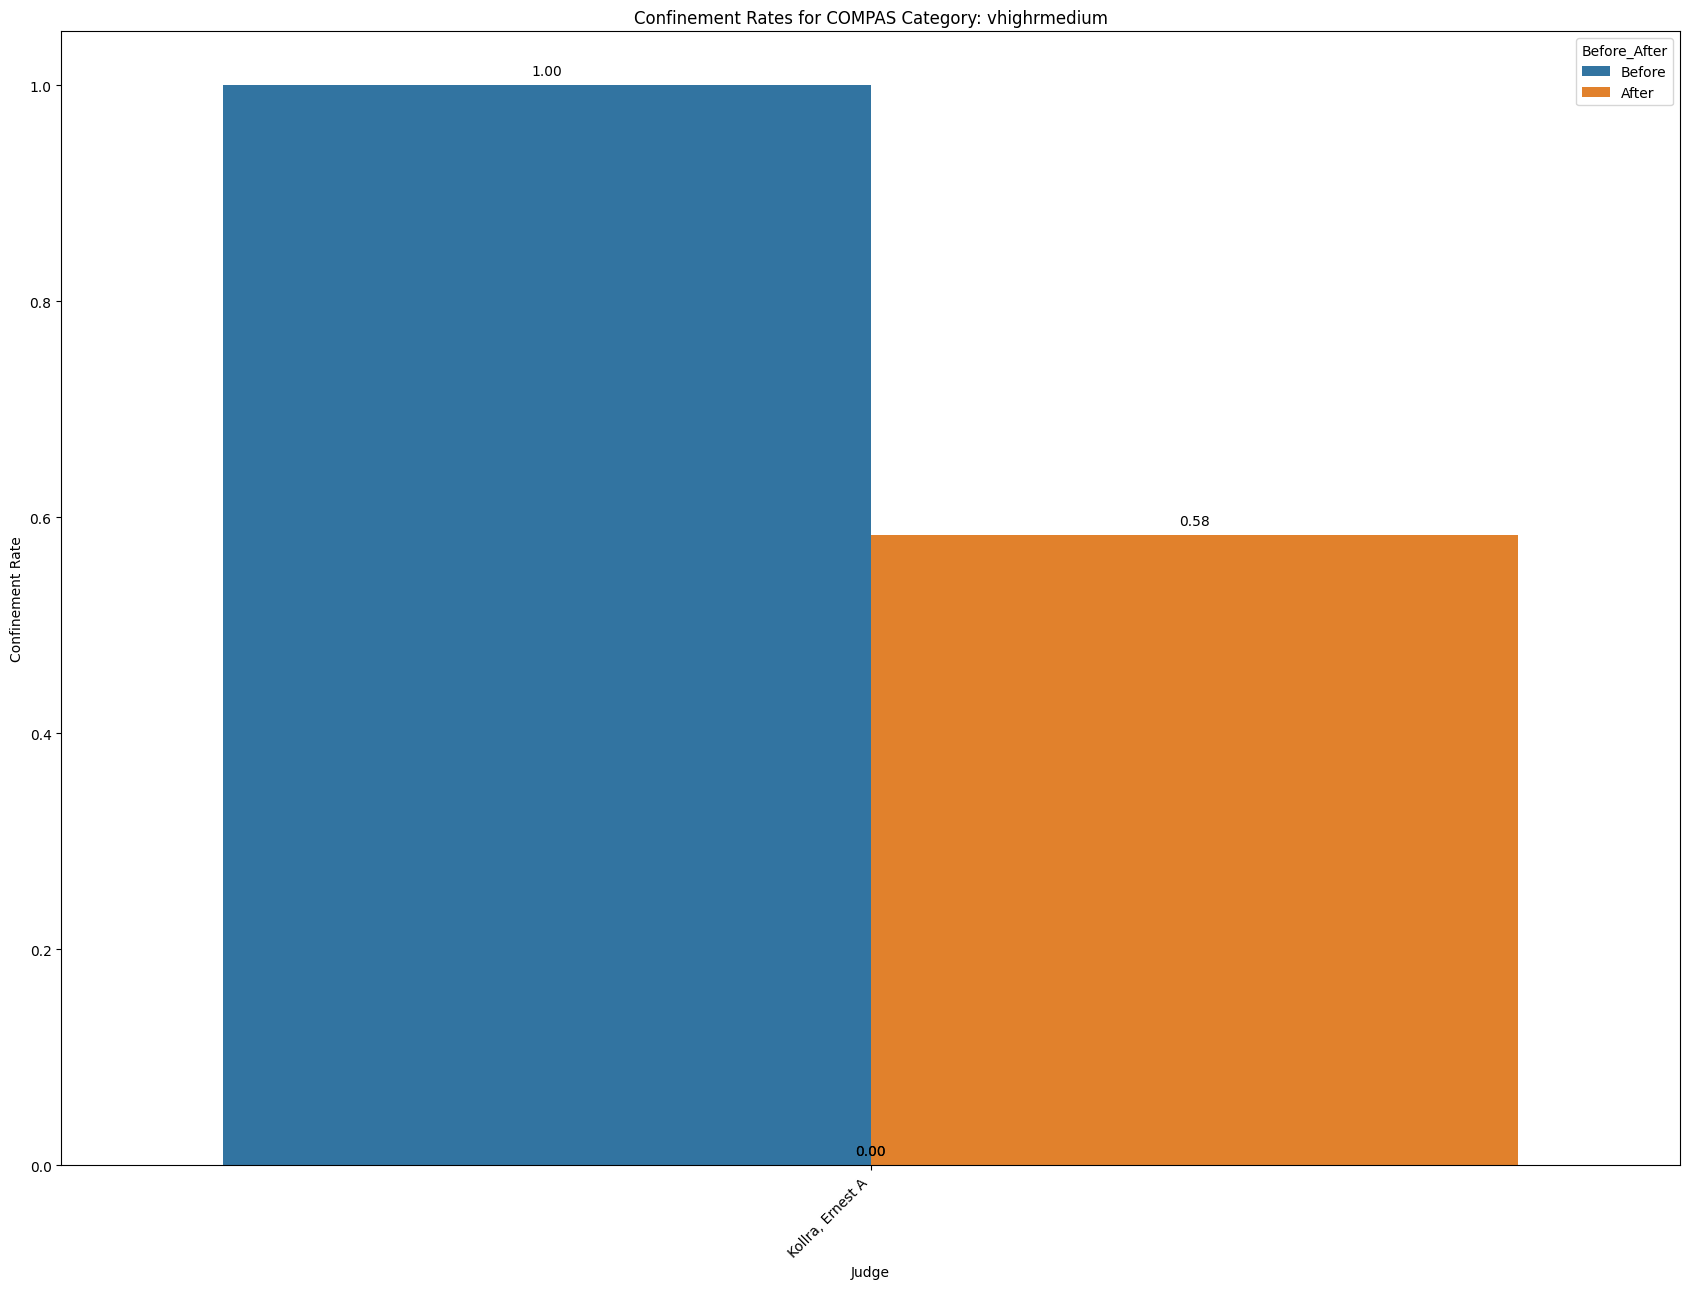

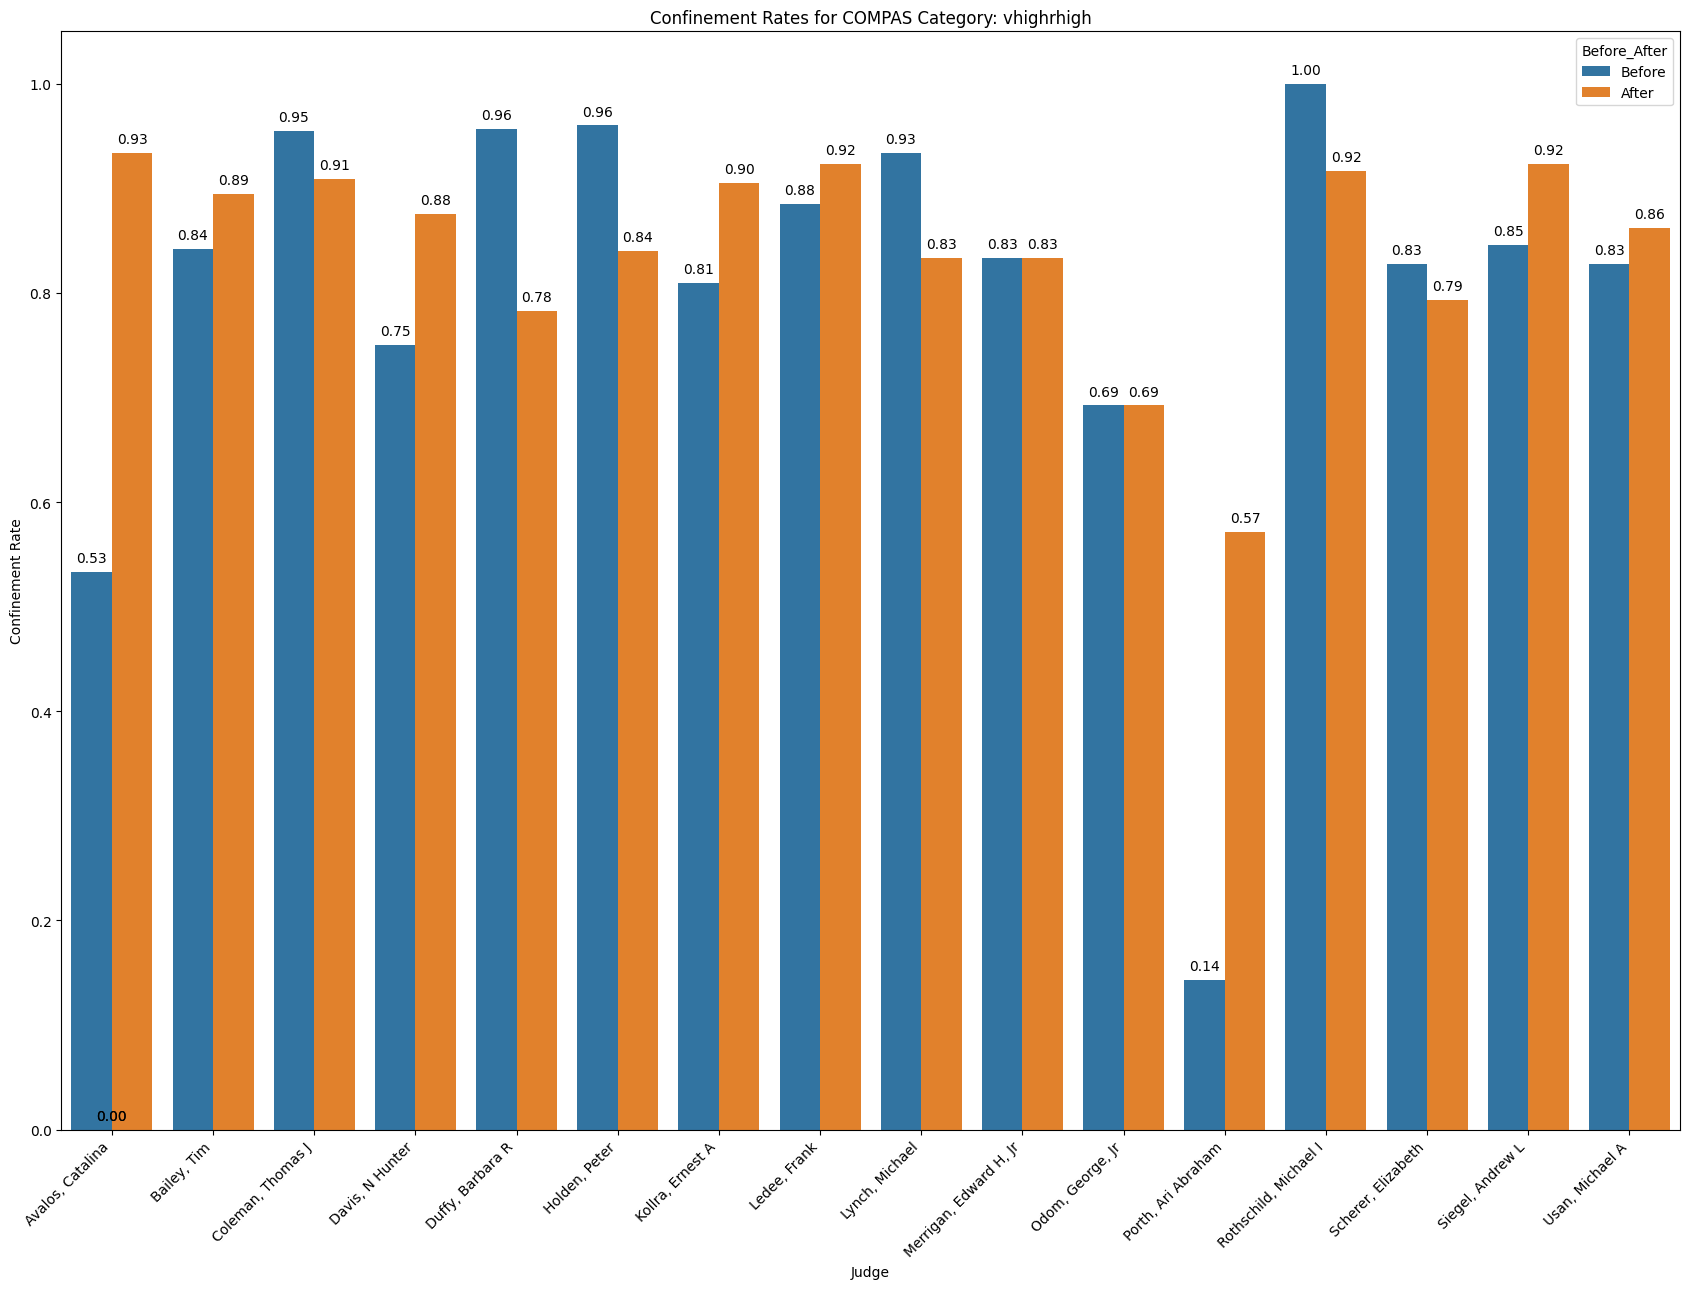

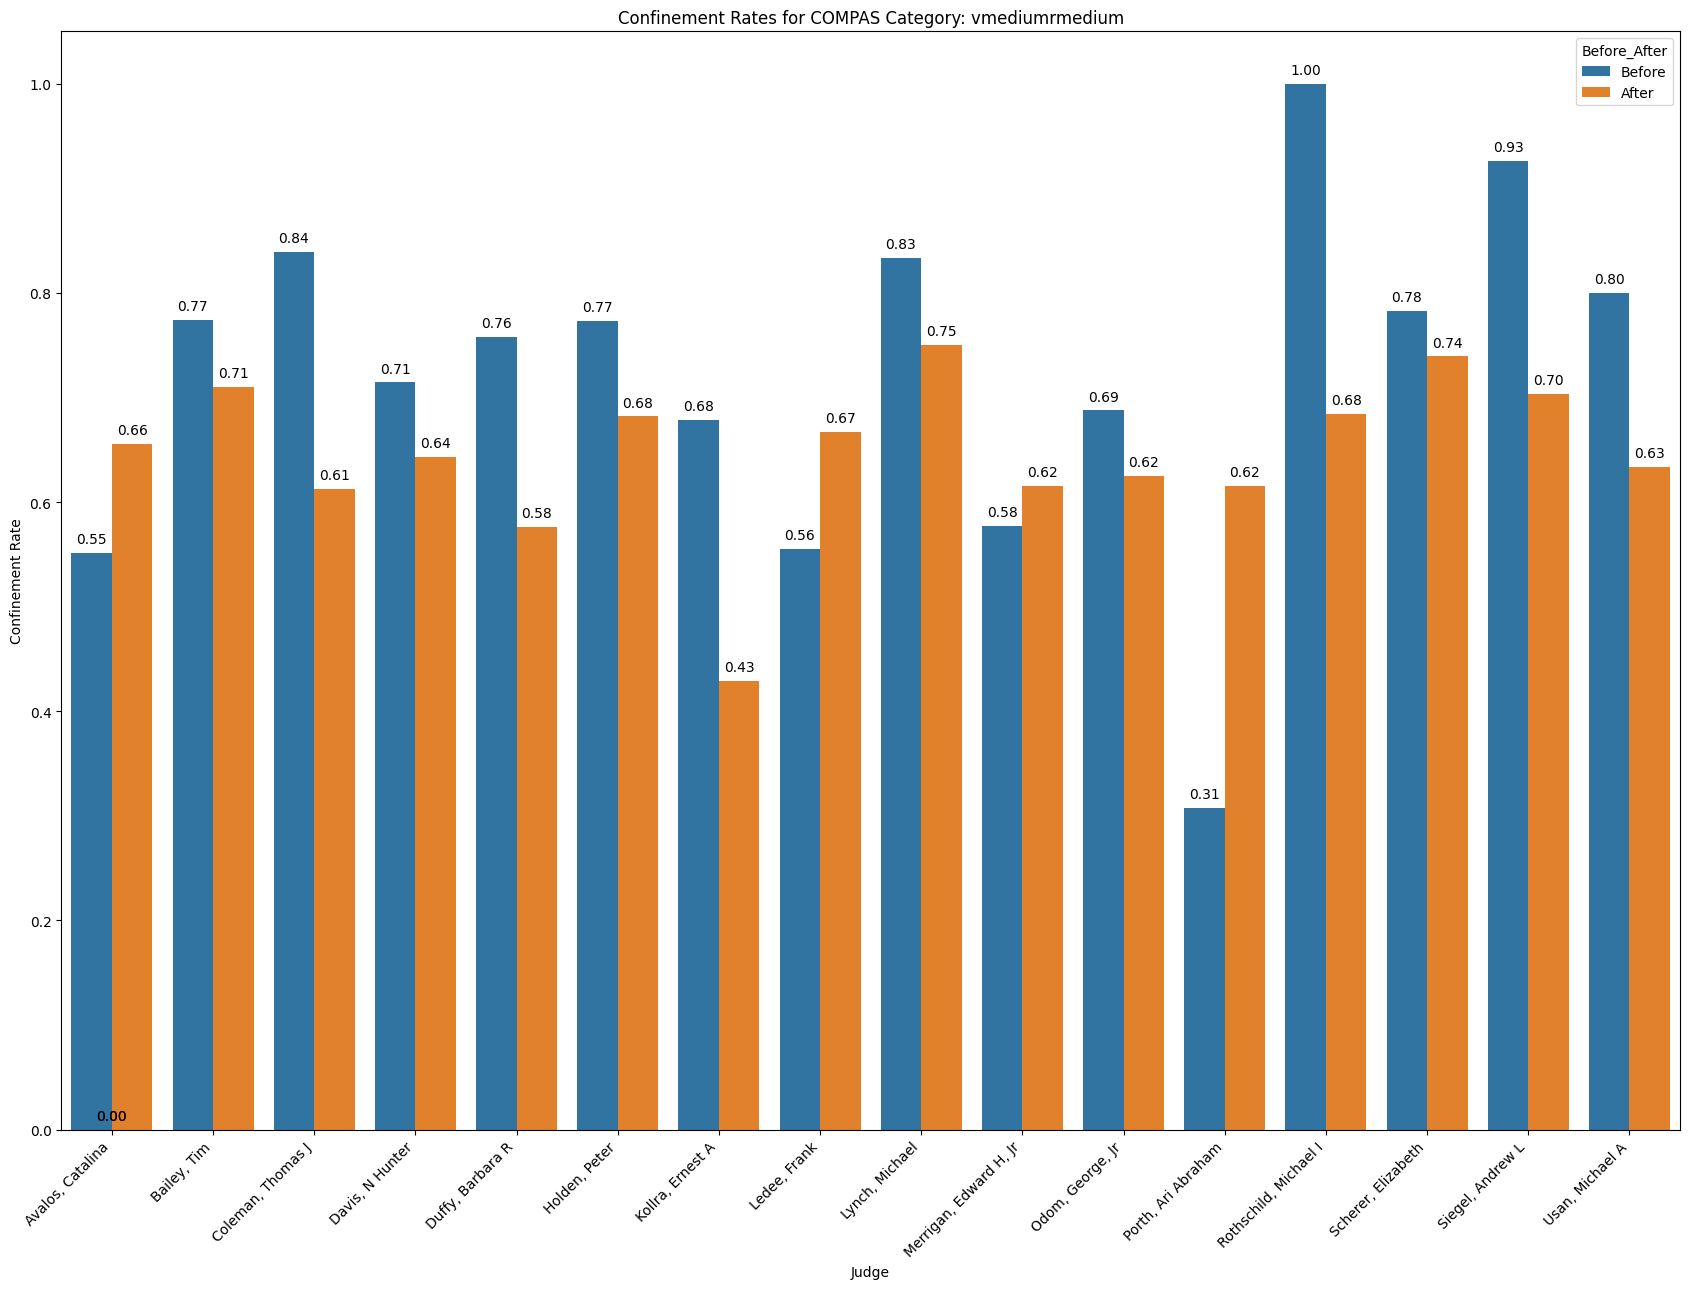

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def prepare_data_for_compas_category(results, compas_category):
    data = []
    for result in results:
        judge_name = result['Judge']
        for cat_result in result['Categories_Results']:
            if cat_result['Category'] == compas_category:
                for index, row in cat_result['Results'].iterrows():
                    before_after = 'Before' if row[f'{compas_category}_vs_none'] == 0 else 'After'
                    data.append([judge_name, before_after, row['confinement'], row['Total_Cases']])
    return data

def plot_for_all_compas_categories(results, compas_categories):
    compas_categories = [cat for cat in compas_categories if cat != 'vhighrlow']

    for compas_category in compas_categories:
        data = prepare_data_for_compas_category(results, compas_category)
        if not data:
            continue

        category_df = pd.DataFrame(data, columns=['Judge', 'Before_After', 'Confinement_Rate', 'Total_Cases'])


        filtered_df = category_df.groupby('Judge').filter(lambda x: (x['Total_Cases'] >= 10).all())

        if filtered_df.empty:
            print(f"No data available for COMPAS category '{compas_category}' after filtering. Skipping.")
            continue

        fig, ax = plt.subplots(figsize=(17, 13))
        sns.barplot(x='Judge', y='Confinement_Rate', hue='Before_After', data=filtered_df, ax=ax)
        ax.set_title(f'Confinement Rates for COMPAS Category: {compas_category}')
        ax.set_ylabel('Confinement Rate')
        ax.set_xlabel('Judge')

        plt.xticks(rotation=45, horizontalalignment='right')

        for index, p in enumerate(ax.patches):
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

        plt.tight_layout()
        plt.show()

plot_for_all_compas_categories(results, compas_categories)



## How influenced is each judge by the introduction of COMPAS scores when sentencing defendants on the fringe? (PSM at the fringe)

In [10]:
from causalml.match import NearestNeighborMatch
import pandas as pd

psm = NearestNeighborMatch(replace=True, ratio=1, random_state=42)

judge_effects = []

for judge in df['judge'].unique():
    judge_df = df[df['judge'] == judge].copy()
    judge_result = {'Judge': judge, 'Effects': {}}

    for category in compas_categories:
        judge_df.loc[:, f'{category}_vs_none'] = judge_df['compas'].apply(lambda x: 1 if x.lower() == category else (0 if x.lower() == 'none' else None))

        judge_df_filtered = judge_df.dropna(subset=[f'{category}_vs_none'])

        if judge_df_filtered[f'{category}_vs_none'].nunique() < 2:
            print(f"Not enough cases to compare for COMPAS category '{category}' for judge '{judge}'. Skipping.")
            continue

        try:
            matched = psm.match(data=judge_df_filtered, treatment_col=f'{category}_vs_none',
                                score_cols=['Race_Black', 'Age_Category', 'gender_male', 'court_felony', 'public_defender_yes'])

            treatment_effect = matched.groupby(f'{category}_vs_none')['confinement'].mean().diff().iloc[-1]

            treatment_counts = matched[f'{category}_vs_none'].value_counts()

            judge_result['Effects'][category] = {
                'Treatment Effect': treatment_effect,
                'Total Cases': treatment_counts.to_dict()
            }

        except Exception as e:
            print(f"Error performing PSM for COMPAS category '{category}' for judge '{judge}': {e}")

    judge_effects.append(judge_result)


for result in judge_effects:
    print(f"Judge: {result['Judge']}")
    for category, effect_info in result['Effects'].items():
        effect = effect_info['Treatment Effect']
        total_cases = effect_info['Total Cases']
        print(f"COMPAS Category: {category}, Estimated Treatment Effect: {effect}, Total Cases: {total_cases}")
    print("\n")


Not enough cases to compare for COMPAS category 'vhighrlow' for judge 'Duffy, Barbara R'. Skipping.
Not enough cases to compare for COMPAS category 'vhighrlow' for judge 'Coleman, Thomas J'. Skipping.
Not enough cases to compare for COMPAS category 'vhighrlow' for judge 'Kollra, Ernest A'. Skipping.
Not enough cases to compare for COMPAS category 'vhighrlow' for judge 'Merrigan, Edward H, Jr'. Skipping.
Not enough cases to compare for COMPAS category 'vhighrlow' for judge 'Holden, Peter'. Skipping.
Not enough cases to compare for COMPAS category 'vhighrlow' for judge 'Scherer, Elizabeth'. Skipping.
Not enough cases to compare for COMPAS category 'vhighrlow' for judge 'Ledee, Frank'. Skipping.
Not enough cases to compare for COMPAS category 'vhighrlow' for judge 'Rothschild, Michael I'. Skipping.
Not enough cases to compare for COMPAS category 'vhighrlow' for judge 'Fein, Martin S'. Skipping.
Not enough cases to compare for COMPAS category 'vhighrlow' for judge 'Usan, Michael A'. Skippi

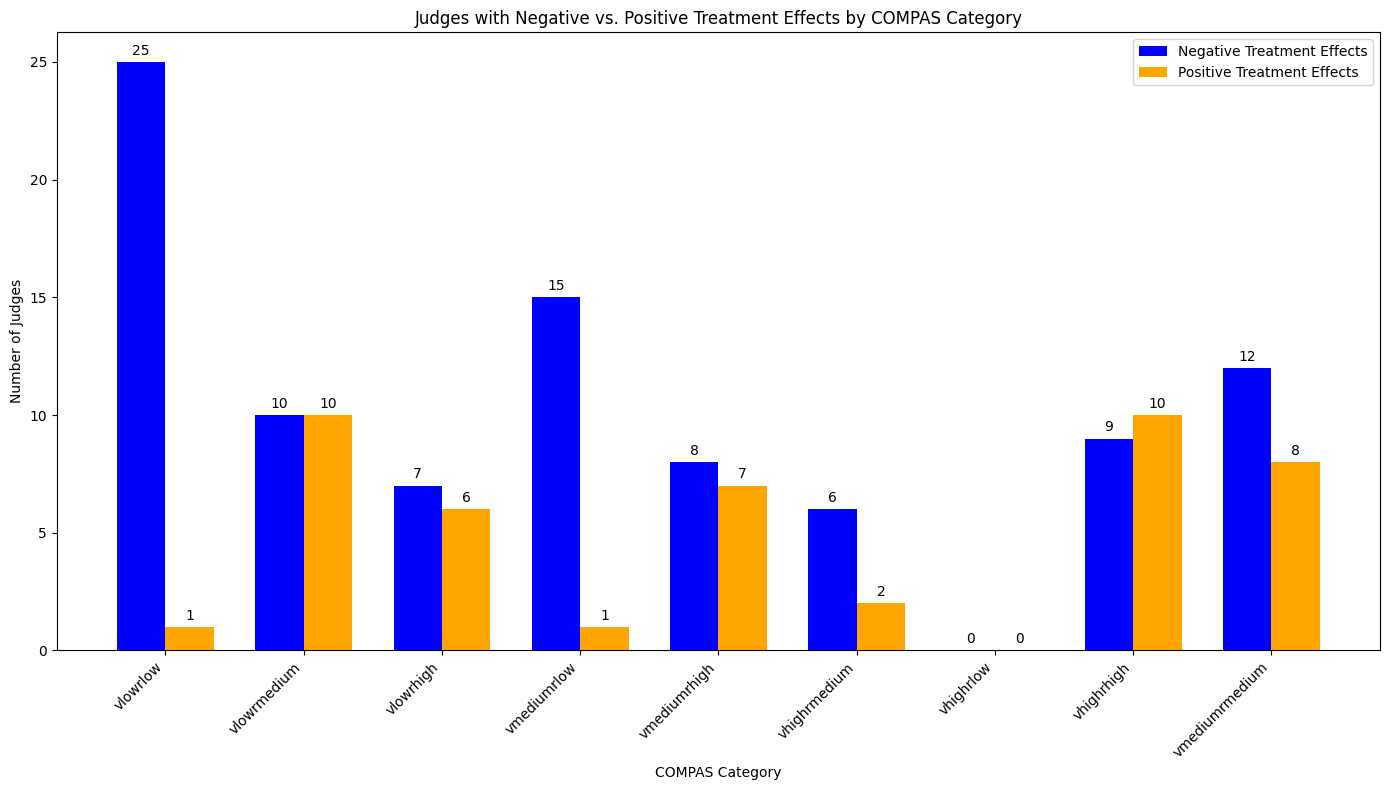

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data generation and setup (assuming 'judge_effects' is already populated)
# This is just a placeholder for your existing data preparation code

# Initialize a dictionary to hold the count of negative and positive treatment effects for each COMPAS category
compas_effect_counts = {category: {'Negative': 0, 'Positive': 0} for category in compas_categories}

# Iterate over the judge effects to count negative and positive effects for each COMPAS category
for result in judge_effects:
    for category, effect_info in result['Effects'].items():
        if 'Total Cases' in effect_info and sum(effect_info['Total Cases'].values()) >= 10:  # Ensure total cases are at least 10
            if effect_info['Treatment Effect'] < 0:
                compas_effect_counts[category]['Negative'] += 1
            elif effect_info['Treatment Effect'] > 0:
                compas_effect_counts[category]['Positive'] += 1

# Data for plotting
categories = list(compas_effect_counts.keys())
negatives = [compas_effect_counts[category]['Negative'] for category in categories]
positives = [compas_effect_counts[category]['Positive'] for category in categories]

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
index = np.arange(len(categories))
bar_width = 0.35

bar1 = ax.bar(index - bar_width/2, negatives, bar_width, label='Negative Treatment Effects', color='blue')
bar2 = ax.bar(index + bar_width/2, positives, bar_width, label='Positive Treatment Effects', color='orange')

ax.set_xlabel('COMPAS Category')
ax.set_ylabel('Number of Judges')
ax.set_title('Judges with Negative vs. Positive Treatment Effects by COMPAS Category')
ax.set_xticks(index)
ax.set_xticklabels(categories, rotation=45, ha="right")
ax.legend()

# Annotate each bar with its height value
for bars in (bar1, bar2):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
# this does not help with anything on the fringe. however, this can be likely be used to tie in to question:
# How influenced is each judge by the introduction of COMPAS scores when sentencing a defendant?


from causalml.match import NearestNeighborMatch
import pandas as pd


psm = NearestNeighborMatch(replace=True, ratio=1, random_state=42)

# Prepare an empty list to store the results
judge_effects = []

# Iterate over each judge
for judge in df['judge'].unique():
    # Create a separate copy of the slice of df for this judge
    judge_df = df[df['judge'] == judge].copy()  # Added .copy() here
    judge_result = {'Judge': judge}

    # Create a binary treatment column for COMPAS score presence
    judge_df['compas_scored'] = judge_df['compas'].apply(lambda x: 0 if x.lower() == 'none' else 1)

    # Filter out rows without a COMPAS score or confinement information
    judge_df_filtered = judge_df.dropna(subset=['compas_scored', 'confinement'])

    # Check if there are enough cases for both treatment and control groups
    if judge_df_filtered['compas_scored'].nunique() < 2:
        print(f"Not enough cases to compare for COMPAS presence for judge '{judge}'. Skipping.")
        continue

    # Perform matching
    try:
        matched = psm.match(data=judge_df_filtered, treatment_col='compas_scored',
                            score_cols=['Race_Black', 'Age_Category', 'gender_male', 'court_felony', 'public_defender_yes'])

        # Calculate the treatment effect
        treatment_effect = matched.groupby('compas_scored')['confinement'].mean().diff().iloc[-1]

        # Count the number of treated and control cases
        treated_count = matched['compas_scored'].sum()
        control_count = len(matched) - treated_count

        # Store the effect and counts in the judge's results
        judge_result['Estimated Treatment Effect'] = treatment_effect
        judge_result['Treated Count'] = treated_count
        judge_result['Control Count'] = control_count

    except Exception as e:
        print(f"Error performing PSM for judge '{judge}': {e}")

    # Append the judge's results to the overall results list
    judge_effects.append(judge_result)

# Print the results
for result in judge_effects:
    print(f"Judge: {result['Judge']}")
    if 'Estimated Treatment Effect' in result:
        print(f"Estimated Treatment Effect of Confinement: {result['Estimated Treatment Effect']}")
        print(f"Treated Count: {result['Treated Count']}")
        print(f"Control Count: {result['Control Count']}")
    print("\n")


Judge: Duffy, Barbara R
Estimated Treatment Effect of Confinement: -0.3157894736842105
Treated Count: 228
Control Count: 228


Judge: Coleman, Thomas J
Estimated Treatment Effect of Confinement: -0.125
Treated Count: 248
Control Count: 248


Judge: Kollra, Ernest A
Estimated Treatment Effect of Confinement: -0.17372881355932213
Treated Count: 236
Control Count: 236


Judge: Merrigan, Edward H, Jr
Estimated Treatment Effect of Confinement: 0.038610038610038644
Treated Count: 259
Control Count: 259


Judge: Holden, Peter
Estimated Treatment Effect of Confinement: -0.14225941422594146
Treated Count: 239
Control Count: 239


Judge: Scherer, Elizabeth
Estimated Treatment Effect of Confinement: -0.09615384615384615
Treated Count: 208
Control Count: 208


Judge: Ledee, Frank
Estimated Treatment Effect of Confinement: -0.07826086956521738
Treated Count: 230
Control Count: 230


Judge: Rothschild, Michael I
Estimated Treatment Effect of Confinement: -0.3303167420814479
Treated Count: 221
Contro